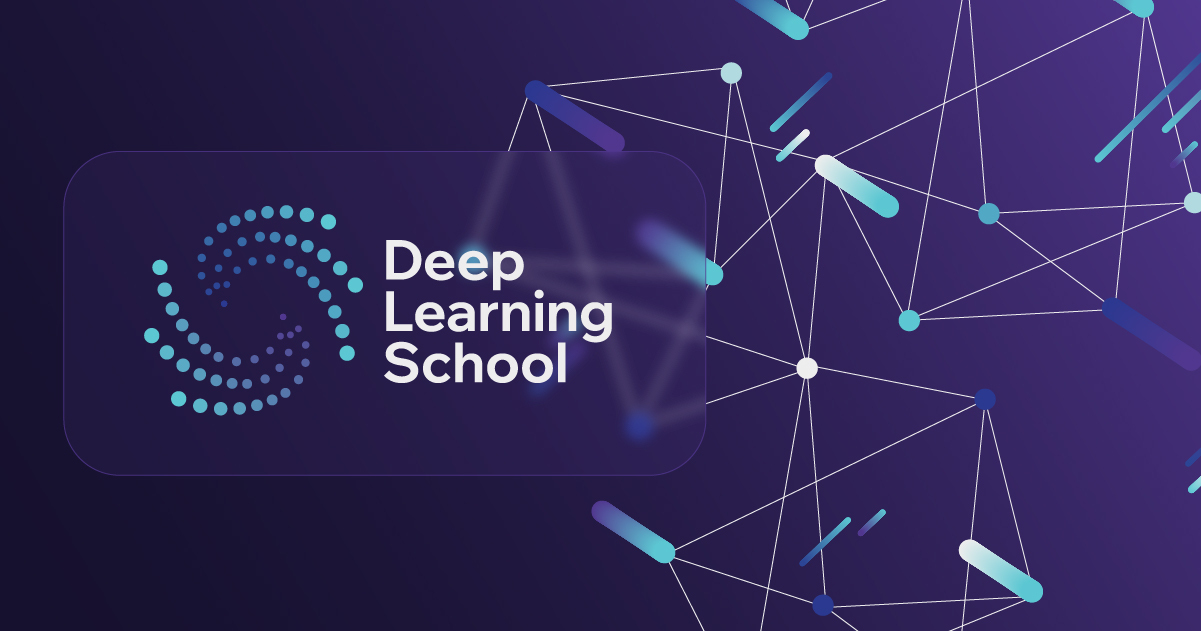

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

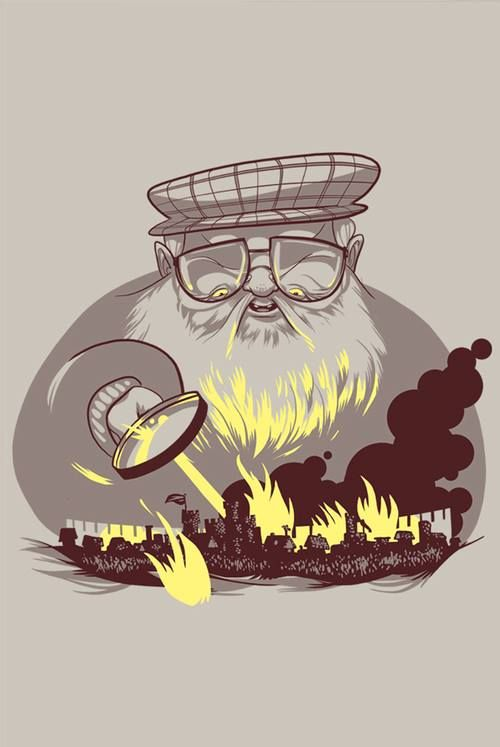

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.65$ --- 4 балла

3) $0.65 > score \geqslant 0.55$ --- 3 балла

4) $0.55 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.45$ --- 1 балл

6) $0.45 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [2]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 65.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 63.9MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data = pd.read_csv("/content/game_of_thrones_train.csv", index_col="S.No")

In [6]:
print(data.head(5))

                      name                 title  ...  popularity isAlive
S.No                                              ...                    
1     Viserys II Targaryen                   NaN  ...    0.605351       0
2              Walder Frey  Lord of the Crossing  ...    0.896321       1
3             Addison Hill                   Ser  ...    0.267559       1
4              Aemma Arryn                 Queen  ...    0.183946       0
5           Sylva Santagar            Greenstone  ...    0.043478       1

[5 rows x 25 columns]


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [4]:
# age
mean_age = data["age"].mean()
data.fillna({"age": mean_age}, inplace = True)

# culture
data.fillna({'culture': "None"}, inplace=True)

In [25]:
# data2["title"].unique()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               1557 non-null   int64  
 1   culture            1557 non-null   object 
 2   book1              1557 non-null   int64  
 3   book2              1557 non-null   int64  
 4   book3              1557 non-null   int64  
 5   book4              1557 non-null   int64  
 6   book5              1557 non-null   int64  
 7   isMarried          1557 non-null   int64  
 8   isNoble            1557 non-null   int64  
 9   age                1557 non-null   float64
 10  isAlive            1557 non-null   int64  
 11  isPopular          1557 non-null   bool   
 12  boolDeadRelations  1557 non-null   bool   
dtypes: bool(2), float64(1), int64(9), object(1)
memory usage: 149.0+ KB


Дававй-те пока просто выкинем title, house, culture


In [41]:
grid = data[data['isAlive'] == 0].groupby('male').size()
print(grid)

male
0     94
1    251
dtype: int64


In [42]:
data["age"].value_counts()

,count
age,
35.290323,1278
100.000000,20
19.000000,12
15.000000,11
16.000000,11
...,...
33.000000,1
86.000000,1
80.000000,1


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [5]:
data["isPopular"] = data['popularity'] > 0.5
data["boolDeadRelations"] = data['numDeadRelations'] > 0
data.drop(columns=["numDeadRelations", "popularity"], inplace=True)

In [6]:
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,None,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,35.290323,0,True,True
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.000000,1,True,True
3,Addison Hill,Ser,1,None,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,35.290323,1,False,False
4,Aemma Arryn,Queen,0,None,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.000000,0,False,False
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.000000,1,False,False


In [7]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

replace_list = {value: key for key, values in cult.items() for value in values}

data['culture'] = data['culture'].replace(replace_list)


In [102]:
data['culture'].unique()

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [8]:
data.drop(columns=["name","title", "house",
                   "dateOfBirth", "mother",
                   "father", "heir", "spouse",
                   "isAliveMother", "isAliveFather",
                   "isAliveHeir", "isAliveSpouse"],
           inplace = True)

In [10]:
data.head()

,male,culture,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,
1,1,None,0,0,0,0,0,0,0,35.290323,0,True,True
2,1,Rivermen,1,1,1,1,1,1,1,97.000000,1,True,True
3,1,None,0,0,0,1,0,0,1,35.290323,1,False,False
4,0,None,0,0,0,0,0,1,1,23.000000,0,False,False
5,0,Dornish,0,0,0,1,0,1,1,29.000000,1,False,False


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [11]:
data['isAlive'].value_counts()

,count
isAlive,
1,1212
0,345


In [23]:
def analyse_feature(name):
  counter = data[name].unique()
  nane_alive = 0
  nane = 0
  alive_counter = [0 for i in range(len(counter))]
  all_counter = [0 for i in range(len(counter))]
  diff = [0 for i in range(len(counter))]
  for cur_house, cur_alive in zip(data[name], data["isAlive"]):
    if cur_alive == 1:
      ix = np.where(counter == cur_house)[0]
      if ix.size > 0:
        ix = ix[0]
        alive_counter[ix] +=1
      else:
        nane_alive +=1
    ix = np.where(counter == cur_house)[0]
    if ix.size > 0:
      ix = ix[0]
      all_counter[ix] +=1
    else:
      nane +=1

  print(alive_counter)
  print(all_counter)
  print([alive_counter[i]/max(all_counter[i], 1)  for i in range(len(counter))])
  print(str(sum(alive_counter)), " / ", str(sum(all_counter)))

  x = [i for i in range(len(counter))]
  for ind, (a, b) in enumerate(zip(alive_counter, all_counter)):
    if b == 0:
      diff[ind] = 1.3
    else:
      diff[ind] = (b-a)/(b)
  #x.append(len(houses))
  plt.figure(figsize=(12, 9))
  plt.plot(x, alive_counter, color="red")
  plt.plot(x, all_counter, color="blue")
  # plt.plot(x, diff, color="green")
  plt.show()

In [98]:
def dataframe_analysis(name):
  plt.figure(figsize=(12, 9))
  plt.scatter(data[name], data['isAlive']

  plt.show()

[1067, 145]
[1357, 200]
[0.7862932940309506, 0.725]
1212  /  1557


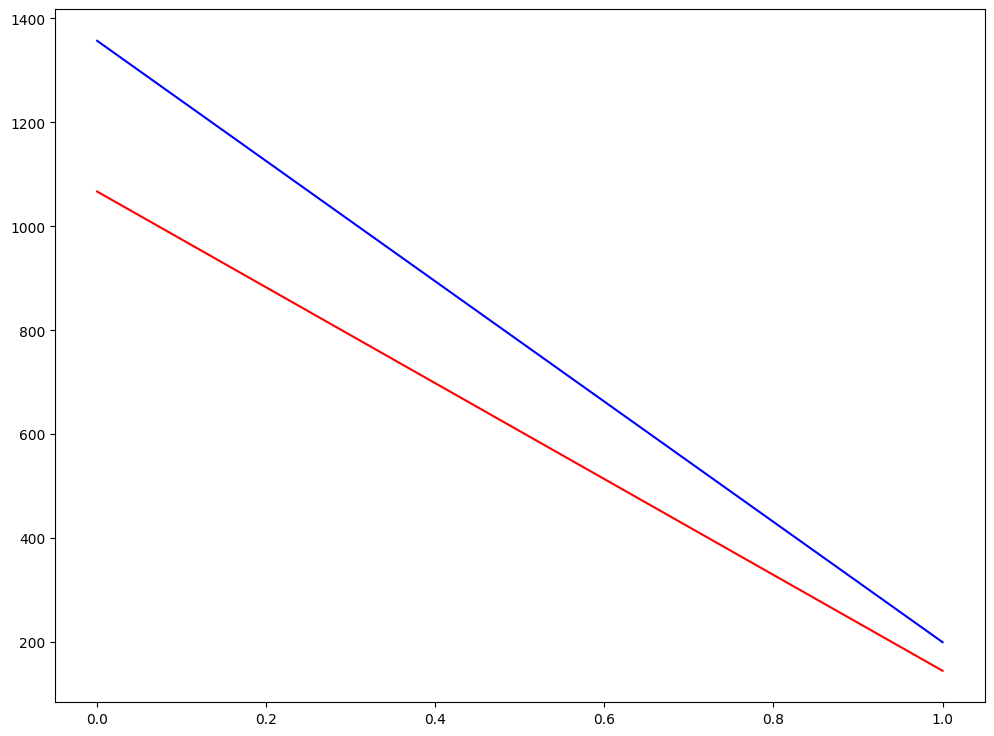

In [100]:

analyse_feature('isMarried')

[669, 543]
[920, 637]
[0.7271739130434782, 0.8524332810047096]
1212  /  1557


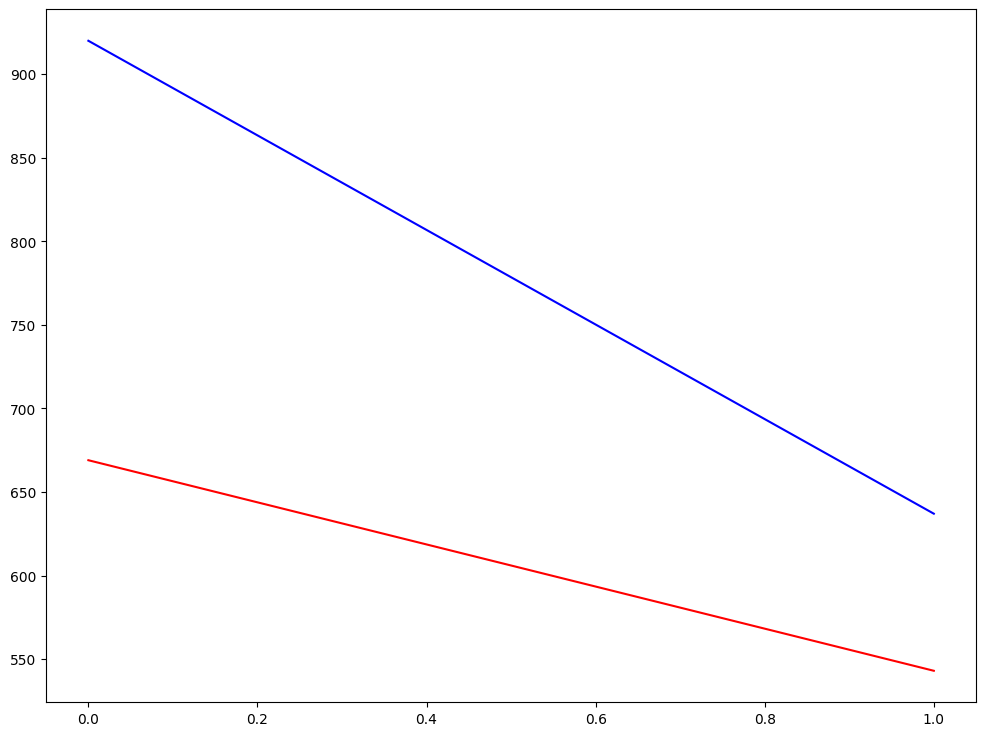

In [95]:
analyse_feature('male')

[11, 1201]
[27, 1530]
[0.4074074074074074, 0.7849673202614379]
1212  /  1557


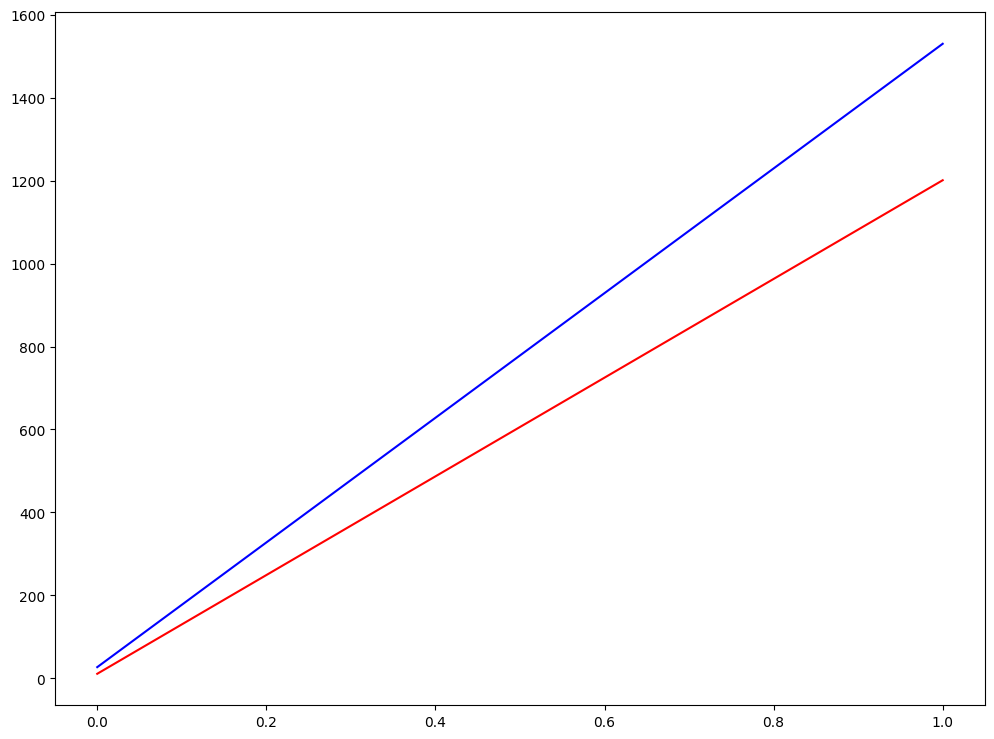

In [73]:
analyse_feature('isPopular')

[30, 1182]
[69, 1488]
[0.43478260869565216, 0.7943548387096774]
1212  /  1557


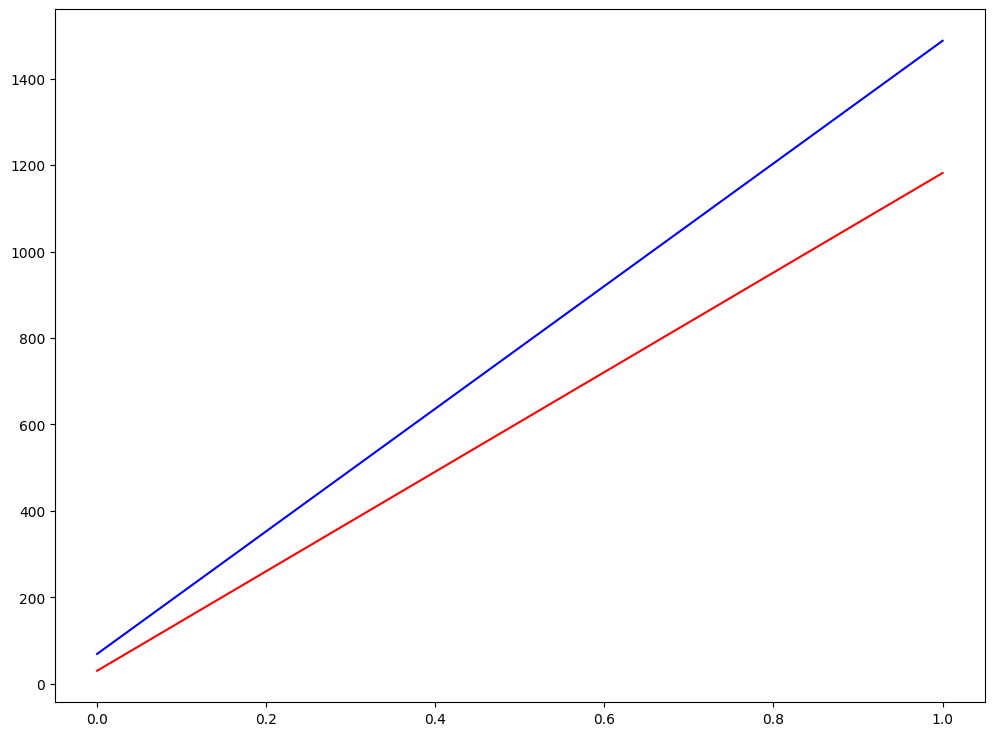

In [75]:
analyse_feature('boolDeadRelations')

[835, 7, 16, 5, 81, 31, 80, 4, 38, 12, 15, 11, 10, 4, 1, 6, 3, 4, 2, 4, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 4, 9, 1, 0, 3, 1, 2, 1, 0, 2, 1, 1, 0, 1, 1, 1]
[1069, 10, 17, 28, 91, 46, 103, 4, 39, 17, 17, 12, 13, 6, 1, 7, 3, 5, 2, 5, 8, 1, 1, 1, 3, 1, 2, 2, 1, 4, 1, 1, 1, 4, 10, 2, 1, 3, 2, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1]
[0.7811038353601497, 0.7, 0.9411764705882353, 0.17857142857142858, 0.8901098901098901, 0.6739130434782609, 0.7766990291262136, 1.0, 0.9743589743589743, 0.7058823529411765, 0.8823529411764706, 0.9166666666666666, 0.7692307692307693, 0.6666666666666666, 1.0, 0.8571428571428571, 1.0, 0.8, 1.0, 0.8, 0.25, 1.0, 1.0, 1.0, 0.6666666666666666, 1.0, 1.0, 0.5, 1.0, 0.25, 0.0, 1.0, 1.0, 1.0, 0.9, 0.5, 0.0, 1.0, 0.5, 0.6666666666666666, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0]
1212  /  1557


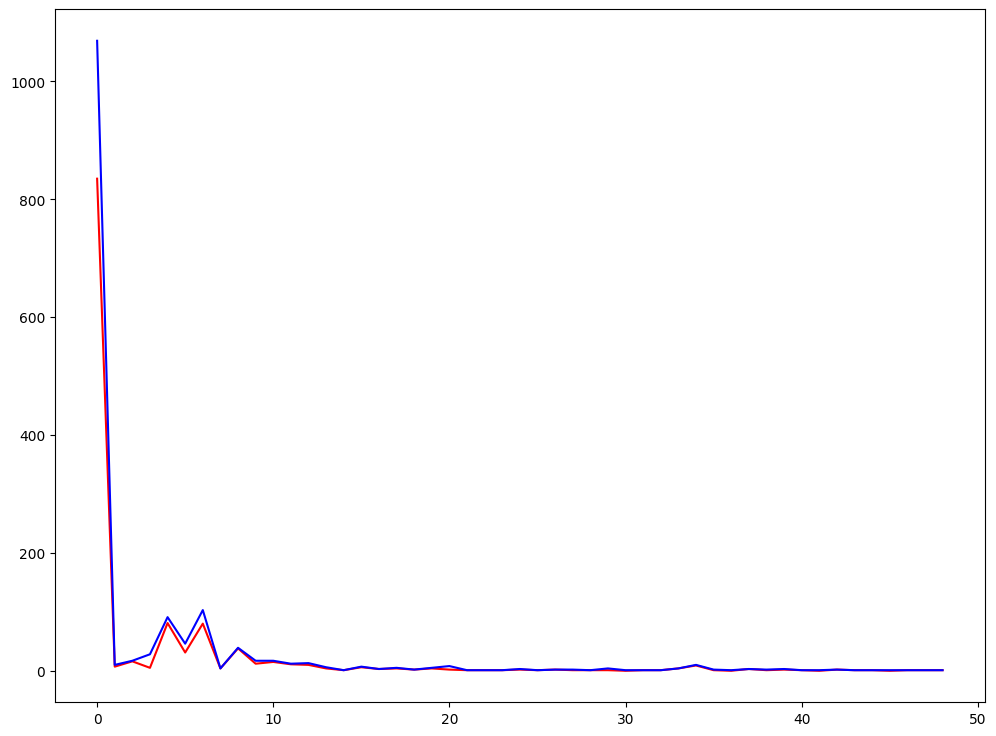

In [24]:
analyse_feature('culture')

[802, 410]
[1043, 514]
[0.7689357622243528, 0.7976653696498055]
1212  /  1557


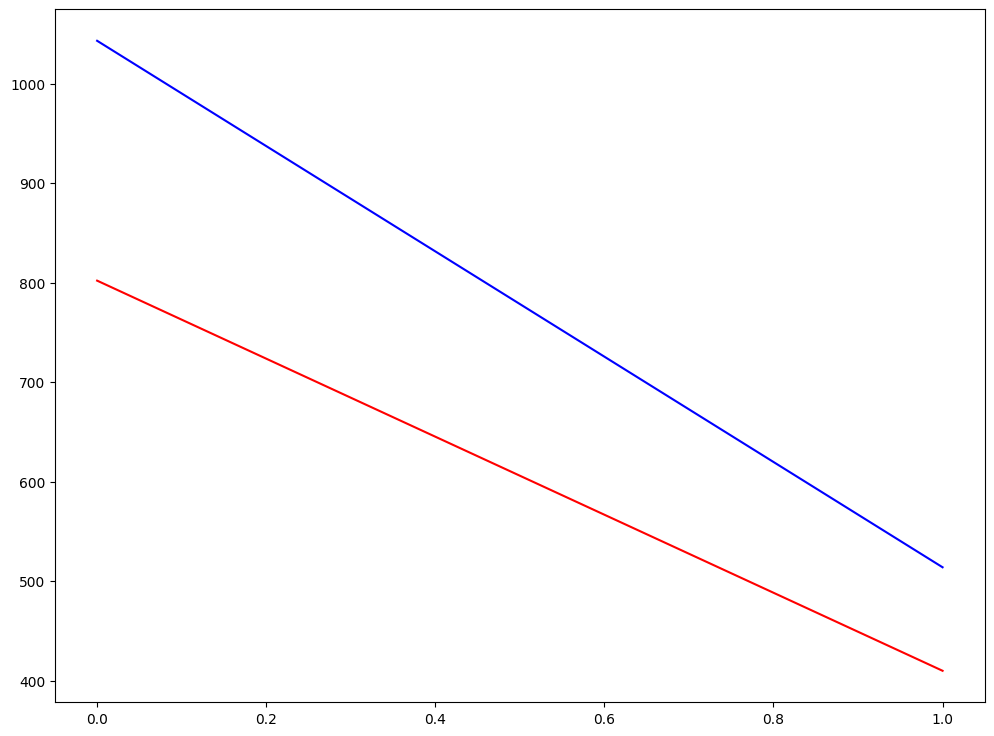

In [88]:
analyse_feature('book5') # можно оставить book 1, 4 и 5

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [21]:
from sklearn.preprocessing import OneHotEncoder

cat_features = ['culture']

encoder = OneHotEncoder(sparse_output=False)
hot_encoded_table = encoder.fit_transform(data[cat_features])
hot_encoded_df = pd.DataFrame(hot_encoded_table, columns=encoder.get_feature_names_out(cat_features), index = data.index)

In [22]:
hot_encoded_df

,culture_Andal,culture_Andals,culture_Astapori,culture_Braavos,culture_Braavosi,culture_Crannogmen,culture_Dorne,culture_Dornish,culture_Dornishmen,culture_Dothraki,...,culture_Vale,culture_Vale mountain clans,culture_Valemen,culture_Valyrian,culture_Westerlands,culture_Westerman,culture_Westermen,culture_Westeros,culture_Wildling,culture_ironborn
S.No,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


from matplotlib import pyplot as plt
hot_encoded_df['culture_Andal'].plot(kind='hist', bins=20, title='culture_Andal')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
hot_encoded_df['culture_Andals'].plot(kind='hist', bins=20, title='culture_Andals')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
hot_encoded_df['culture_Astapori'].plot(kind='hist', bins=20, title='culture_Astapori')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
hot_encoded_df['culture_Braavos'].plot(kind='hist', bins=20, title='culture_Braavos')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
hot_encoded_df.plot(kind='scatter', x='culture_Andal', y='culture_Andals', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
hot_encoded_df.plot(kind='scatter', x='culture_Andals', y='culture_Astapori', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
hot_encoded_df.plot(kind='scatter', x='culture_Astapori', y='culture_Braavos', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
hot_encoded_df.plot(kind='scatter', x='culture_Braavos', y='culture_Braavosi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
hot_encoded_df['culture_Andal'].plot(kind='line', figsize=(8, 4), title='culture_Andal')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
hot_encoded_df['culture_Andals'].plot(kind='line', figsize=(8, 4), title='culture_Andals')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
hot_encoded_df['culture_Astapori'].plot(kind='line', figsize=(8, 4), title='culture_Astapori')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
hot_encoded_df['culture_Braavos'].plot(kind='line', figsize=(8, 4), title='culture_Braavos')
plt.gca().spines[['top', 'right']].set_visible(False)

In [26]:
df_encoded = pd.concat([data, hot_encoded_df], axis=1)
df_encoded = df_encoded.drop(cat_features, axis=1)

In [18]:
pd.crosstab(data['boolDeadRelations'], data['book5'])

book5,0,1
boolDeadRelations,,
False,1011,477
True,32,37


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               1557 non-null   int64  
 1   culture            1557 non-null   object 
 2   book1              1557 non-null   int64  
 3   book2              1557 non-null   int64  
 4   book3              1557 non-null   int64  
 5   book4              1557 non-null   int64  
 6   book5              1557 non-null   int64  
 7   isMarried          1557 non-null   int64  
 8   isNoble            1557 non-null   int64  
 9   age                1557 non-null   float64
 10  isAlive            1557 non-null   int64  
 11  isPopular          1557 non-null   bool   
 12  boolDeadRelations  1557 non-null   bool   
dtypes: bool(2), float64(1), int64(9), object(1)
memory usage: 181.3+ KB


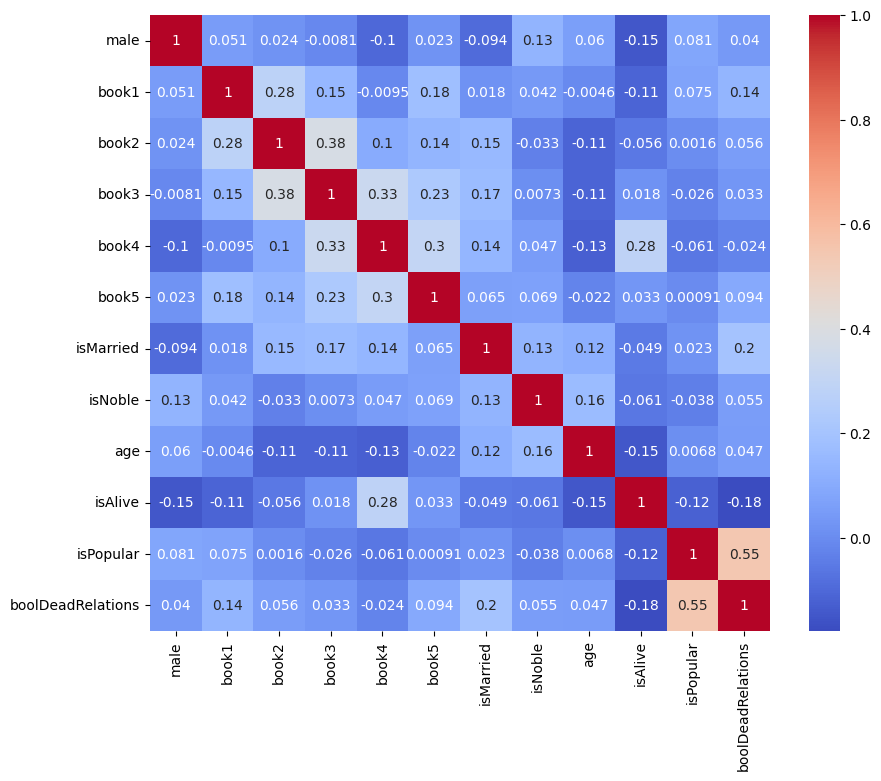

In [39]:
plt.figure(figsize=(10, 8))
df_heat = data.drop(['culture'], axis = 1, inplace=False)
sns.set()
sns.heatmap(df_heat.corr(), annot=True, cmap='coolwarm')
plt.show()

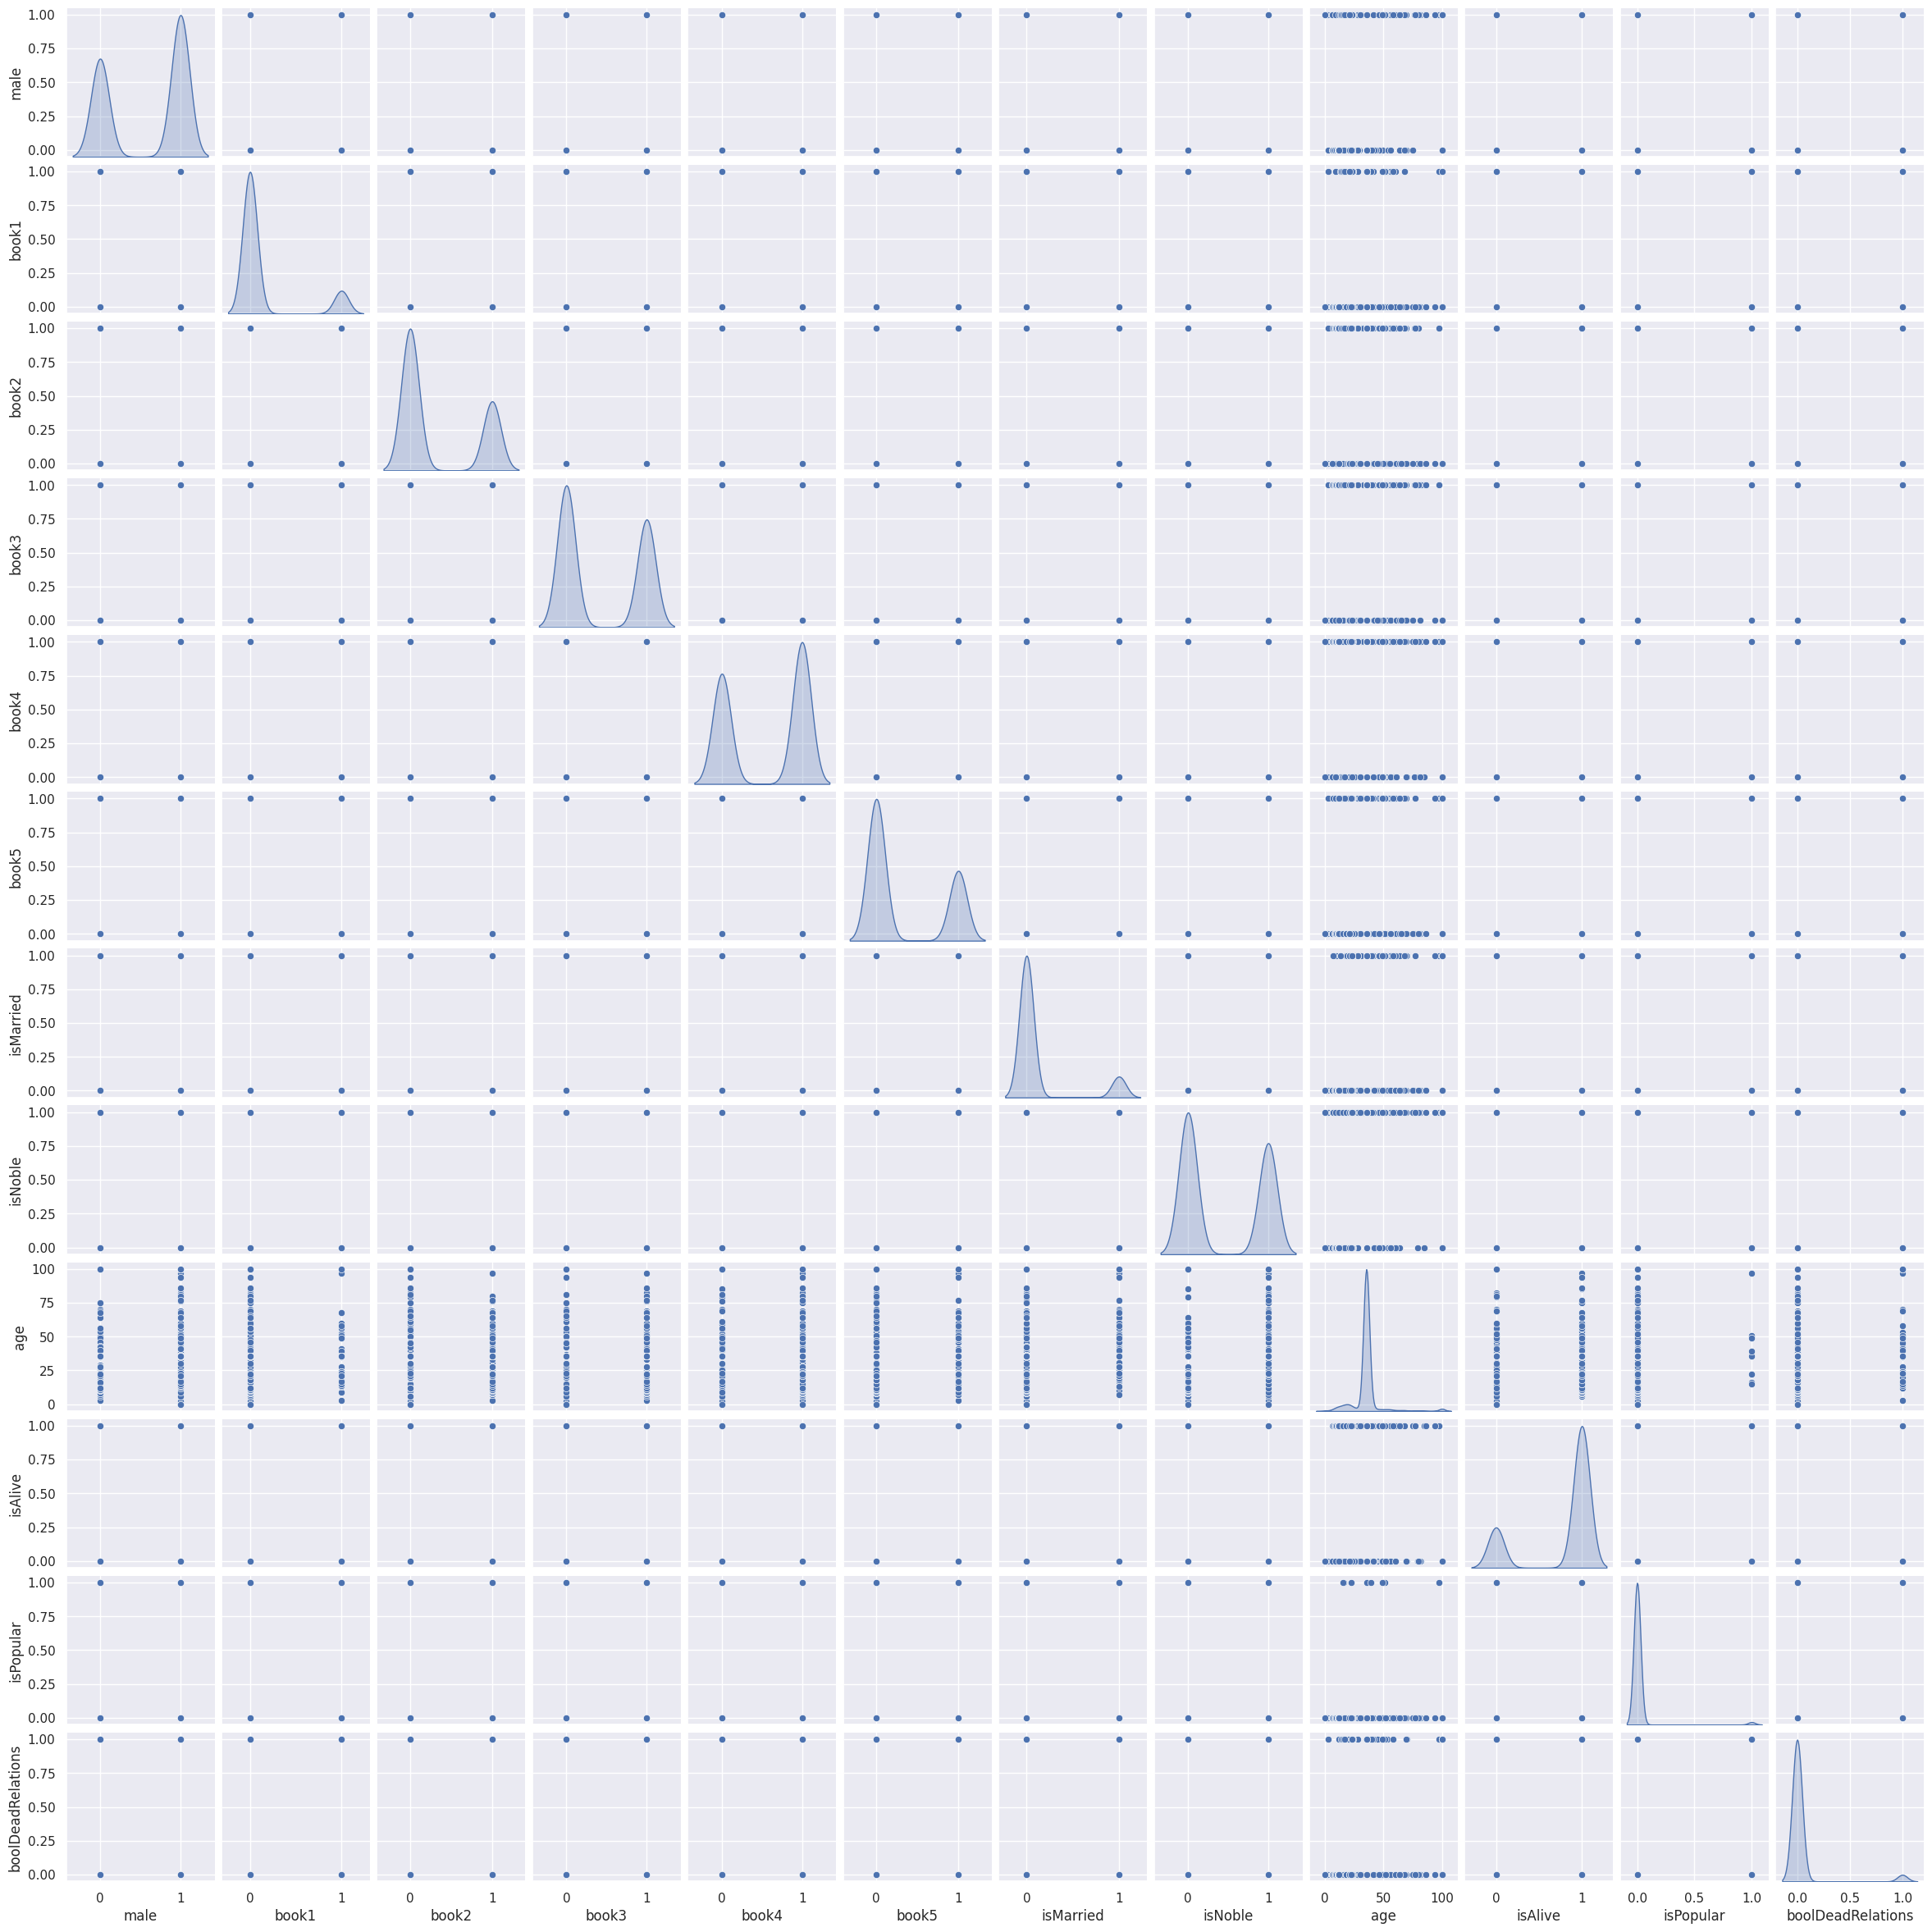

In [42]:
sns.set()
sns.pairplot(df_heat, height = 2 ,kind ='scatter',diag_kind='kde') # взаимные графики на куче признаков
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [46]:
type(df_encoded)

pandas.core.frame.DataFrame

In [51]:
X = df_encoded.drop(columns=['isAlive'], axis = 1).values
y = df_encoded['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [56]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [57]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [75]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=25, max_iter=10000)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

In [76]:
q = [int(i^j) for i, j in zip(y_pred, y_test)]
print(sum(q)/len(q))

0.25


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели


# Шаг 2. обучение модели


# Шаг 3. Предсказание на тестовых данных


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.42MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)